# Ecuaciones diferenciales

## Ecuaciones diferenciales de primer orden con una variable

Resolveremos ecuaciones diferenciales de primer orden con una variable que no son resueltas fácilmente.

E.g.

$$\frac{dx}{dt}=\frac{2x}{t}+\frac{3x^2}{t^3}$$

### Método de Euler

Supongamos que tenemos
$$\frac{dx}{dt}=f(x,t)$$

Con una condición inicial en x y t. Expandiendo $x(t+h)$ en serie de Taylor:
$$
x(t+h)=x(t)+h\frac{dx}{dt}+\frac{1}{2}h^2\frac{d^2x}{dt^2}+\cdots\\
       =x(t)+hf(x,t)+O(h^{2})
$$

A programar:
            $$
            x(t+h)=x(t)+hf(x,t)
            $$
 

Ejercicio: 

$$\frac{dx}{dt}=-x^3+\sin(t)$$

Haz un programa que grafique t en el intervalo [0,10] con 1000 pasos

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def Euler(f,x0,t0,t):
    h=1e-5
    x = np.zeros(len(t))
    x[0] = x0
    t[0] = t0
    for n in range(0,len(t)-1):
        x[n+1] = x[n] + h*f(x[n],t)
        
    return x

In [34]:
t = np.linspace(0,10,1000)
x0=0 
t0=0



f = lambda x,t: -x**3 + sin(t) 
eu = Euler(f,x0,t0,t)
print(f(0,10))
plt.plot(t,eu,'r-')
plt.legend(['Solución por Euler'])
plt.axis([0,10,0,1])
plt.grid(True)
plt.title("Espacio fase de la EDO con x(0)=0.5 y v(0)=0$")
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

El error de truncamiento o error local es $h^2$. Cada paso tiene este error. Sin embargo, a lo largo de los 1000 pasos, se obtiene un error acumulado o el error global del método numérico.

El error global se obtiene sumando N-1 veces el error local:
$$
\sum_{k=0}^{N-1} \frac{1}{2}h^2\left[\frac{d^2x}{dt^2} \right]_{t=t_k}=
\frac{1}{2}h\sum_{k=0}^{N-1}h\left[\frac{df}{dt} \right]_{t=t_k}\approx
\frac{h}{2}\int_a^b\frac{df}{dt} dt=\frac{h}{2}\left[f(x(b),b)-f(x(a),a)\right]
$$

Entonces, el error global es proporcional a $h$

## Método de Runge-Kutta de orden 2

Cuidado: Extender la serie de Taylor a un orden superior no hace que se mejore la solución (sólo en algunos casos). Para mejorar usaremos el método de Runge-Kutta de segundo orden, o también conocido como el método del punto medio.

Dessarrollando con serie de Taylor alrededor de $t+\frac{1}{2}h$ para $x(t+h)$:

$$
x(t+h)=x(t+\frac{1}{2}h)+\frac{1}{2}h \left(\frac{dx}{dt}\right)_{t+\frac{1}{2}h}+\frac{1}{8}h^2\left(\frac{d^2x}{dt^2}\right)_{t+\frac{1}{2}h}+O(h^{3})\\
$$

Haciendo lo mismo para $x(t)$:

$$
x(t)=x(t+\frac{1}{2}h)-\frac{1}{2}h \left(\frac{dx}{dt}\right)_{t+\frac{1}{2}h}+\frac{1}{8}h^2\left(\frac{d^2x}{dt^2}\right)_{t+\frac{1}{2}h}+O(h^{3})\\
$$

Restando la segunda expresión de la primera y reacomodando términos:

$$
x(t+h)=x(t)+h\left(\frac{dx}{dt}\right)_{t+\frac{1}{2}h}+O(h^{3})\\
=x(t)+hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)+O(h^{3})
$$

Un detalle importante, no conocemos en realidad $x(t+\frac{1}{2}h)$! 

Para eso usamos el método de Euler, de esta manera podemos escribir:

$$
k_1=hf(x,t)\\
k_2=hf(x+\frac{1}{2}k_1,t+\frac{1}{2}h)\\
x(t+h)=x(t)+k_2
$$


Ya vimos que $x(t+h)$ tiene terminos de $O(h^{3})$ lo cual es aún mejor que el de Euler ($O(h^{2})$). Pero estamos asumiendo que usar Euler para la estimación original no mete terminos en Runge-Kutta en $x(t+h)$ mayores que $O(h^{3})$.

Si haces una demostración correcta de porque este es el caso y lo expones en video tendras medio punto extra sobre esta tarea. (Hint: demuestra que $k_2$ va como $O(h^{3})$, expandiendo en serie de Taylor $f$ y $x$ alrededor de $t+\frac{1}{2}h$)



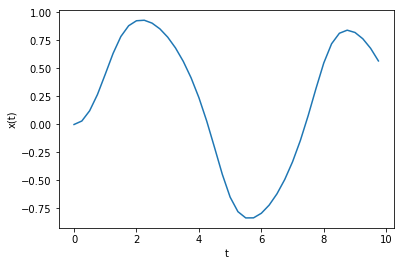

In [5]:
#Aqui pon tu metodo de Runge-Kutta de orden 2, resolviendo el mismo sistema que el
#caso anterior, tienes que obtener la grafica de abajo. Usa 10, 20, 50 y cien pasos.
#Describe como se compara con el metodo de Euler

In [3]:
### Método de Runge-Kutta de orden 4.

$$
k_1=hf(x,t)
$$

$$
k_2=hf(x+0.5k_1,t+0.5h)
$$

$$
k_3=hf(x+0.5k_2,t+0.5h)
$$

$$
k_4=hf(x+k_3,t+h)
$$

$$
x(t+h)=x(t)+\frac{(k_1+2k_2+2k_3+k_4)}{6.}
$$

Si haces un vídeo exponiendo correctamente la deducción de Runge-Kutta de órden 4 tienes medio punto extra sobre esta tarea.

Errores en las deducciones y en las implementaciones pueden llevar a resultados que parecen sensatos pero en realidad son erroneos!

Describe un criterio para averiguar rápidamente si el código que resuelve una ecuación diferencial esta mal:

PON AQUI TU RESPUESTA

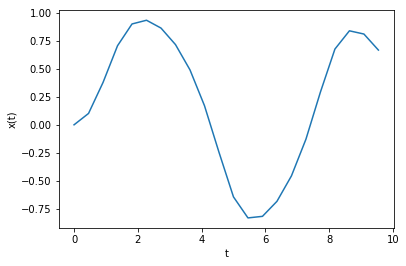

In [4]:
#Implementa Runge Kutta de orden 4, haz lo mismo que en el caso anterior pero con este método.